# Data Visualization

## Large Car Dataset 

### Prediction of Car Sales by Model

#### Initialization and Imports

In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

data = pd.read_csv("car_data.csv")
data.head()

C:\Users\cpani\AppData\Local\Temp\ipykernel_15248\4080463895.py:8: DtypeWarning: Columns (1,8,9,17,18,22,25,26,32,37,45,53,65,67,69,79,91,93,107,111,113,120,122,133,144) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("car_data.csv")


,vin,stockNum,firstSeen,lastSeen,msrp,askPrice,mileage,isNew,color,interiorColor,...,vf_VIN,vf_ValveTrainDesign,vf_VehicleType,vf_WheelBaseLong,vf_WheelBaseShort,vf_WheelBaseType,vf_WheelSizeFront,vf_WheelSizeRear,vf_Wheels,vf_Windows
0,abc5f0360059cf7b6fa8368db57f220ab0d87d582bf6ce...,11701A,2019-05-06,2019-05-06,1498,1498,0,False,Gray,NaN,...,abc5f0360059cf7b6fa8368db57f220ab0d87d582bf6ce...,NaN,PASSENGER CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e24402cc77f6fd2d6a9dd626ad92795b717814340f1ab1...,9055B,2019-05-06,2019-05-06,10589,10589,0,False,Super Black,NaN,...,e24402cc77f6fd2d6a9dd626ad92795b717814340f1ab1...,NaN,PASSENGER CAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1c5a8dc966b3d3b379e10477d9ff8a8aa13edf43acc7f7...,11816A,2017-06-03,2019-05-07,11992,9940,0,False,White,NaN,...,1c5a8dc966b3d3b379e10477d9ff8a8aa13edf43acc7f7...,NaN,MULTIPURPOSE PASSENGER VEHICLE (MPV),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,edce23814c88f5a1d1af700c27ad7f4c9d705aa9873317...,11847,2019-05-06,2019-05-07,12387,12387,0,False,Silver Ice Metallic,NaN,...,edce23814c88f5a1d1af700c27ad7f4c9d705aa9873317...,Dual Overhead Cam (DOHC),PASSENGER CAR,NaN,106.3,NaN,17.0,17.0,4.0,4.0
4,6b4f8c610d14d864f024adb26cd4f0eddcff3fa18c16e3...,9097,2019-05-06,2019-05-07,41659,41659,0,True,Black Metallic,NaN,...,6b4f8c610d14d864f024adb26cd4f0eddcff3fa18c16e3...,NaN,TRUCK,156.8,145.0,NaN,17.0,17.0,4.0,NaN


#### Understanding the Dataset

In [ ]:
# Check for empty fields

data.isnull().sum()

In [ ]:
data.columns.values.tolist()

In [ ]:
data.info()

In [ ]:
print(data.describe())

In [ ]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

##### Filtering Required Fields in Dataset

In [ ]:
predict = "askPrice"
dataFiltered = data[["askPrice", 'mileage', 'isNew', 'color', 'interiorColor',
            'brandName', 'vf_ABS', 'vf_AdaptiveCruiseControl', 'vf_AirBagLocFront',
            'vf_AirBagLocSide', 'vf_BodyClass', 'vf_DriveType', 'vf_EngineCylinders',
            'vf_EngineHP', 'vf_FuelTypePrimary', 'vf_Make', 'vf_Seats', 'vf_TopSpeedMPH',
            'vf_TractionControl', 'vf_TransmissionSpeeds', 'vf_TransmissionStyle']]

In [ ]:
dataFiltered.info()

In [ ]:
dataFiltered.head()

In [ ]:
dataFiltered.isnull().sum()

In [ ]:
colorDf = pd.DataFrame(dataFiltered.color.value_counts()).reset_index().rename({'index': 'color', 'color': 'freq'}, axis=1) 
colorDf['ratio']  = (colorDf['freq']/len(dataFiltered))
colorDf.head(10)

In [ ]:
dataFiltered.to_csv('dataFiltered.csv', encoding='utf-8')

#### NaN Removal and Replace

In [ ]:
valuesToReplace = {'color': 'null', 'interiorColor': 'null', 
                   'brandName': 'null', 'vf_ABS': 'null', 'vf_AdaptiveCruiseControl': 'null',
                   'vf_AirBagLocFront': 'null', 'vf_AirBagLocSide': 'null', 
                   'vf_BodyClass': 'null', 'vf_DriveType': 'null', 
                   'vf_EngineCylinders': 0, 'vf_EngineHP': 0, 
                   'vf_FuelTypePrimary': 'null', 'vf_Make': 'null', 
                   'vf_Seats': 0, 'vf_TopSpeedMPH': 0, 'vf_TractionControl': 'null',
                   'vf_TransmissionSpeeds': 0, 'vf_TransmissionStyle': 'null',
                  }
dataCleaned = dataFiltered.fillna(value=valuesToReplace)

In [ ]:
dataCleaned.isnull().sum()

In [ ]:
dataCleaned.to_csv('dataCleaned.csv', encoding='utf-8')

#### Data Tokenization and Encoding

In [164]:
from sklearn.preprocessing import LabelEncoder

dataCleaned = pd.read_csv("./dataCleaned.csv", header=0, index_col=0)
dataCleaned = pd.DataFrame(dataCleaned)

In [165]:
dataCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5695015 entries, 0 to 5695014
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   askPrice                  int64  
 1   mileage                   int64  
 2   isNew                     bool   
 3   color                     object 
 4   interiorColor             object 
 5   brandName                 object 
 6   vf_ABS                    object 
 7   vf_AdaptiveCruiseControl  object 
 8   vf_AirBagLocFront         object 
 9   vf_AirBagLocSide          object 
 10  vf_BodyClass              object 
 11  vf_DriveType              object 
 12  vf_EngineCylinders        float64
 13  vf_EngineHP               float64
 14  vf_FuelTypePrimary        object 
 15  vf_Make                   object 
 16  vf_Seats                  float64
 17  vf_TopSpeedMPH            float64
 18  vf_TractionControl        object 
 19  vf_TransmissionSpeeds     float64
 20  vf_TransmissionStyle    

In [166]:
# Get all numerical types of data first, convert Bool to Int
dataPrePro = dataCleaned.filter(['askPrice', 'mileage', 
                                 'vf_EngineCylinders', 'vf_EngineHP', 'vf_Seats',
                                 'vf_TopSpeedMPH', 'vf_TransmissionSpeeds', 'isNew'])
dataPrePro['isNew'] = dataPrePro['isNew'].astype(int)

In [167]:
LE = LabelEncoder()

In [168]:
dataTypes = dataCleaned.columns.to_series().groupby(dataCleaned.dtypes).groups

In [169]:
dataTypesDict = {k.name:v for k,v in dataTypes.items()}
objectTypeCols = dataTypesDict['object'].tolist()

In [211]:
inverses = {}

for col in objectTypeCols:
    dataPrePro[col] = LE.fit_transform(dataCleaned[col]).astype('int64')
    inverses[col] = (LE.fit(dataCleaned[col]), LE.classes_)

In [172]:
dataPrePro.head()

,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
0,1498,0,0.0,0.0,0.0,0.0,0.0,0,7752,18610,...,3,3,0,7,2,10,10,76,3,7
1,10589,0,4.0,0.0,0.0,0.0,0.0,0,16196,18610,...,3,3,0,2,33,3,6,78,3,7
2,9940,0,4.0,178.0,0.0,0.0,0.0,0,17482,18610,...,3,3,0,1,35,3,6,31,3,7
3,12387,0,4.0,0.0,5.0,130.0,0.0,0,15047,18610,...,2,3,0,1,33,10,6,11,2,1
4,41659,0,8.0,395.0,6.0,0.0,0.0,1,2398,18610,...,2,3,0,1,31,2,6,31,2,1


In [ ]:
dataPrePro['isNew'] = dataPrePro['isNew'].astype('int64')

In [ ]:
dataPrePro.info()

In [ ]:
dataPrePro.to_csv('dataPrePro.csv', encoding='utf-8')

##### Data Split

Split data into training and testing via a 20% split

In [1]:
import pandas as pd

dataPrePro = pd.read_csv("./dataPrePro.csv", header=0, index_col=0)
dataPrePro = pd.DataFrame(dataPrePro)

In [2]:
dataPrePro.head()

,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
0,1498,0,0.0,0.0,0.0,0.0,0.0,0,7752,18610,...,3,3,0,7,2,10,10,76,3,7
1,10589,0,4.0,0.0,0.0,0.0,0.0,0,16196,18610,...,3,3,0,2,33,3,6,78,3,7
2,9940,0,4.0,178.0,0.0,0.0,0.0,0,17482,18610,...,3,3,0,1,35,3,6,31,3,7
3,12387,0,4.0,0.0,5.0,130.0,0.0,0,15047,18610,...,2,3,0,1,33,10,6,11,2,1
4,41659,0,8.0,395.0,6.0,0.0,0.0,1,2398,18610,...,2,3,0,1,31,2,6,31,2,1


In [3]:
df_sample = dataPrePro.groupby("askPrice", group_keys=False).apply(lambda x:x.sample(frac=0.01))

In [4]:
predict = 'askPrice'

x = np.array(df_sample.drop([predict], 1))
y = np.array(df_sample[predict])

C:\Users\cpani\AppData\Local\Temp\ipykernel_15248\3206343411.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df_sample.drop([predict], 1))


In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [6]:
xtrain

array([[0.00000e+00, 6.00000e+00, 2.83000e+02, ..., 5.50000e+01,
        3.00000e+00, 7.00000e+00],
       [1.43488e+05, 8.00000e+00, 0.00000e+00, ..., 3.60000e+01,
        3.00000e+00, 7.00000e+00],
       [0.00000e+00, 6.00000e+00, 2.80000e+02, ..., 4.40000e+01,
        3.00000e+00, 1.00000e+00],
       ...,
       [7.29400e+04, 4.00000e+00, 1.70000e+02, ..., 3.10000e+01,
        2.00000e+00, 7.00000e+00],
       [0.00000e+00, 4.00000e+00, 1.73000e+02, ..., 2.00000e+01,
        2.00000e+00, 1.00000e+00],
       [4.03620e+04, 4.00000e+00, 2.40000e+02, ..., 1.06000e+02,
        3.00000e+00, 7.00000e+00]])

In [7]:
 df_sample.columns[1:]

Index(['mileage', 'vf_EngineCylinders', 'vf_EngineHP', 'vf_Seats',
       'vf_TopSpeedMPH', 'vf_TransmissionSpeeds', 'isNew', 'color',
       'interiorColor', 'brandName', 'vf_ABS', 'vf_AdaptiveCruiseControl',
       'vf_AirBagLocFront', 'vf_AirBagLocSide', 'vf_BodyClass', 'vf_DriveType',
       'vf_FuelTypePrimary', 'vf_Make', 'vf_TractionControl',
       'vf_TransmissionStyle'],
      dtype='object')

Index(['askPrice', 'mileage', 'vf_EngineCylinders', 'vf_EngineHP', 'vf_Seats',
       'vf_TopSpeedMPH', 'vf_TransmissionSpeeds', 'isNew', 'color',
       'interiorColor', 'brandName', 'vf_ABS', 'vf_AdaptiveCruiseControl',
       'vf_AirBagLocFront', 'vf_AirBagLocSide', 'vf_BodyClass', 'vf_DriveType',
       'vf_FuelTypePrimary', 'vf_Make', 'vf_TractionControl',
       'vf_TransmissionStyle'],
      dtype='object')


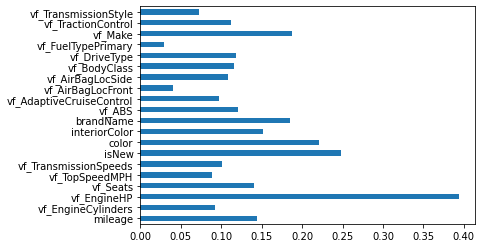

In [8]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
%matplotlib inline

imp = mutual_info_regression(xtrain, ytrain)
print(df_sample.columns)
fimp = pd.Series(imp, df_sample.columns[1:])
fimp.plot(kind="barh",)
plt.show()

In [19]:
!pip install skfeature-chappers

     -------------------------------------- 66.3/66.3 kB 890.3 kB/s eta 0:00:00


In [9]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt
%matplotlib inline

imp = fisher_score.fisher_score(xtrain, ytrain)
fimp = pd.Series(imp, df_sample.columns[1:])
fimp.plot(kind="barh",)
plt.show()


KeyboardInterrupt



### Models

##### Decision Tree Regression

In [10]:
from sklearn.tree import DecisionTreeRegressor
modelDTree = DecisionTreeRegressor()
modelDTree.fit(xtrain, ytrain)
predictionsDTree = modelDTree.predict(xtest)

from sklearn.metrics import mean_absolute_error
modelDTree.score(xtest, predictionsDTree)

1.0

Feature: 0, Score: 0.84020
Feature: 1, Score: 0.00009
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00091
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.09411
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00405
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00016
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00044
Feature: 15, Score: 0.06004
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


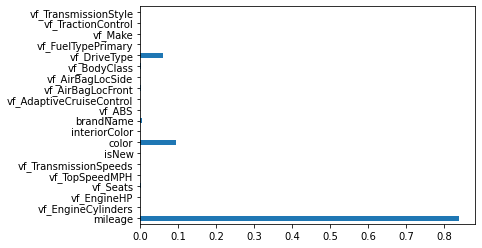

In [11]:
importance = modelDTree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

fimp = pd.Series(importance, df_sample.columns[1:])
fimp.plot(kind="barh",)
plt.show()

#### Adaboost Regression Model

In [12]:
from sklearn.ensemble import AdaBoostRegressor

#Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=1)
AdaRegModel = AdaBoostRegressor(n_estimators=50, base_estimator=DTR ,learning_rate=1)
 
#Creating the model on Training Data
AdaboostModel=AdaRegModel.fit(xtrain, ytrain)
predictionsAda = AdaboostModel.predict(xtest)

AdaboostModel.score(xtest, predictionsAda)

1.0

Feature: 0, Score: 0.00000
Feature: 1, Score: 1.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


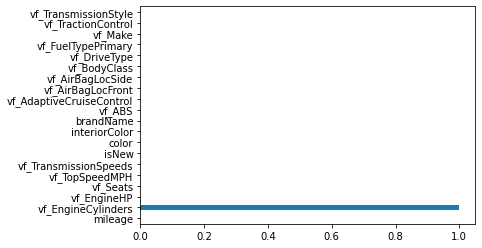

In [13]:
importance = AdaboostModel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

fimp = pd.Series(importance, df_sample.columns[1:])
fimp.plot(kind="barh",)
plt.show()

#### KNN Regression Model

In [24]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

KNNmodel = neighbors.KNeighborsRegressor()
KNNmodel.fit(xtrain, ytrain)

predictionsKNN = KNNmodel.predict(xtest)

KNNmodel.score(xtest, predictionsKNN)

1.0

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(KNNmodel, xtest, ytest, scoring='neg_mean_squared_error')

Feature: 0, Score: 10887902584889.46289
Feature: 1, Score: 25414284802768.12500
Feature: 2, Score: 79530910.41250
Feature: 3, Score: 8300548.73750
Feature: 4, Score: 27521038.77500
Feature: 5, Score: 19915477.82500
Feature: 6, Score: 22936172.02500


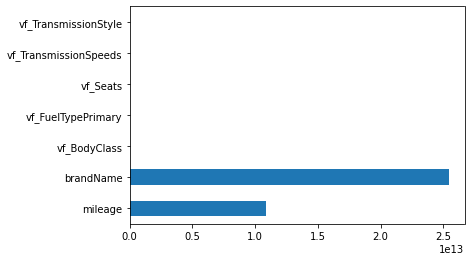

In [38]:
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

fimp = pd.Series(importance, df_sample.columns[1:])
fimp.plot(kind="barh",)
plt.show()

#### Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression

linearModel = LinearRegression()
linearModel.fit(xtrain, ytrain)

predictionsLinear = linearModel.predict(xtest)

print(linearModel.score(xtest, predictionsLinear))


1.0


Feature: 0, Score: -2.58891
Feature: 1, Score: 95216.28331
Feature: 2, Score: -1863.12222
Feature: 3, Score: 93104.08502
Feature: 4, Score: 940.02799
Feature: 5, Score: 9698.70059
Feature: 6, Score: -262344.65476
Feature: 7, Score: -8.88618
Feature: 8, Score: -3.60156
Feature: 9, Score: -1371.91686
Feature: 10, Score: 354904.79484
Feature: 11, Score: -314866.57875
Feature: 12, Score: 248867.03877
Feature: 13, Score: -11901.89838
Feature: 14, Score: 4577.68636
Feature: 15, Score: -41893.32173
Feature: 16, Score: 1547.28587
Feature: 17, Score: -1371.91686
Feature: 18, Score: 254584.67319
Feature: 19, Score: -21318.76044


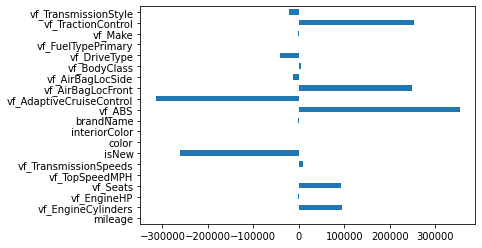

In [17]:
importance =  linearModel.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

fimp = pd.Series(importance, df_sample.columns[1:])
fimp.plot(kind="barh",)
plt.show()

#### Gradient Boost

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
modelGboost = GradientBoostingRegressor()
modelGboost.fit(xtrain, ytrain)
predictionsGboost = modelGboost.predict(xtest)

from sklearn.metrics import mean_absolute_error
modelGboost.score(xtest, predictionsGboost)

1.0

Feature: 0, Score: 0.70691
Feature: 1, Score: 0.06958
Feature: 2, Score: 0.00018
Feature: 3, Score: 0.00920
Feature: 4, Score: 0.00038
Feature: 5, Score: 0.00007
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.10978
Feature: 8, Score: 0.00112
Feature: 9, Score: 0.03091
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.03172
Feature: 12, Score: 0.00654
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00048
Feature: 15, Score: 0.03078
Feature: 16, Score: 0.00010
Feature: 17, Score: 0.00226
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


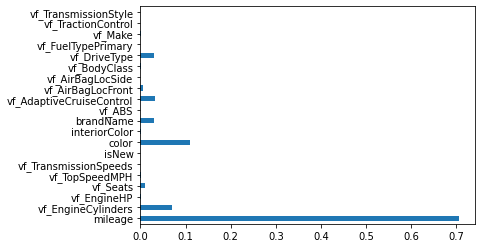

In [19]:
importance = modelGboost.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

fimp = pd.Series(importance, df_sample.columns[1:])
fimp.plot(kind="barh",)
plt.show()

#### XGBoost 

In [47]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 2.8 MB/s eta 0:00:00


In [20]:
import xgboost as xgb

params = {
    "learning_rate": 0.1,
    "max_depth": 5,
    "objective": "reg:squarederror",
    "n_estimators": 100
}

# Create the XGBoost model
modelXGB = xgb.XGBRegressor(**params)
modelXGB.fit(xtrain, ytrain)
predictionsXGB = modelXGB.predict(xtest)

from sklearn.metrics import mean_absolute_error
modelXGB.score(xtest, predictionsXGB)

1.0

Feature: 0, Score: 0.68191
Feature: 1, Score: 0.00056
Feature: 2, Score: 0.01747
Feature: 3, Score: 0.01009
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00001
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.17041
Feature: 8, Score: 0.00312
Feature: 9, Score: 0.00897
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00017
Feature: 12, Score: 0.00497
Feature: 13, Score: 0.00276
Feature: 14, Score: 0.00904
Feature: 15, Score: 0.09047
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00005


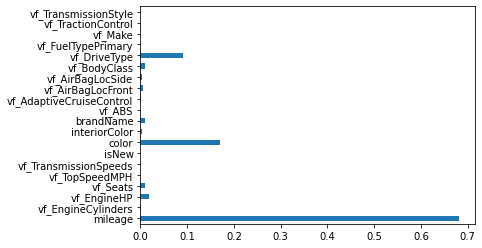

In [21]:
importance = modelXGB.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

fimp = pd.Series(importance, df_sample.columns[1:])
fimp.plot(kind="barh",)
plt.show()

#### Random Forest

In [22]:
from sklearn.ensemble import RandomForestRegressor

modelRand = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
modelRand.fit(xtrain, ytrain)
predictionsRand = modelRand.predict(xtest)

from sklearn.metrics import mean_absolute_error
modelRand.score(xtest, predictionsRand)

1.0

Feature: 0, Score: 0.19443
Feature: 1, Score: 0.01552
Feature: 2, Score: 0.02666
Feature: 3, Score: 0.00172
Feature: 4, Score: 0.01597
Feature: 5, Score: 0.00062
Feature: 6, Score: 0.01229
Feature: 7, Score: 0.16046
Feature: 8, Score: 0.23287
Feature: 9, Score: 0.03260
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.13686
Feature: 12, Score: 0.00038
Feature: 13, Score: 0.00215
Feature: 14, Score: 0.00143
Feature: 15, Score: 0.08841
Feature: 16, Score: 0.00008
Feature: 17, Score: 0.07637
Feature: 18, Score: 0.00118
Feature: 19, Score: 0.00000


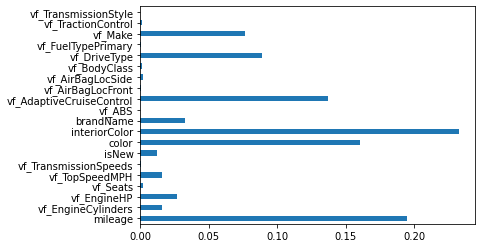

In [23]:
importance = modelRand.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

fimp = pd.Series(importance, df_sample.columns[1:])
fimp.plot(kind="barh",)
plt.show()

### Data Inferences

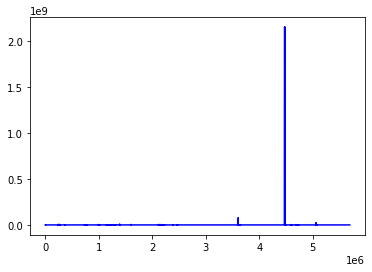

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(dataPrePro.index, dataPrePro['askPrice'], '-b')
dataPrePro['askPrice'].replace(1, 5)
plt.show()

In [87]:
dataPrePro['askPrice'].max()

2147483647

In [90]:
dataPrePro[dataPrePro['askPrice'] == 2147483647].shape

(435, 21)

In [92]:
int32Index = dataPrePro[dataPrePro['askPrice'] == 2147483647].index
dataPrePro.drop(int32Index , inplace=True)

In [93]:
dataPrePro[dataPrePro['askPrice'] == 2147483647].shape

(0, 21)

In [95]:
dataPrePro['askPrice'].max()

78787878

In [100]:
strange = dataPrePro[dataPrePro['askPrice'] == 78787878].index
dataPrePro.drop(strange , inplace=True)

In [101]:
dataPrePro['askPrice'].max()

25002480

In [104]:
strange = dataPrePro[dataPrePro['askPrice'] == 25002480].index
dataPrePro.drop(strange , inplace=True)

In [105]:
dataPrePro['askPrice'].max()

10000000

In [107]:
strange = dataPrePro[dataPrePro['askPrice'] == 10000000].index
dataPrePro.drop(strange , inplace=True)

In [108]:
dataPrePro['askPrice'].max()

5877140

In [110]:
strange = dataPrePro[dataPrePro['askPrice'] == 5877140].index
dataPrePro.drop(strange , inplace=True)

In [134]:
strange = dataPrePro[dataPrePro['askPrice'] == 0].index
dataPrePro.drop(strange , inplace=True)

In [111]:
dataPrePro['askPrice'].max()

5490900

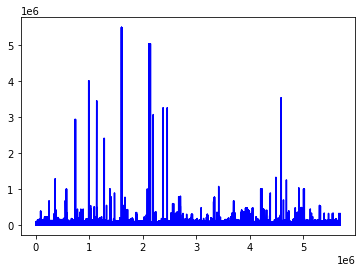

In [135]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(dataPrePro.index, dataPrePro['askPrice'], '-b')
dataPrePro['askPrice'].replace(1, 5)
plt.show()

In [118]:
dataPrePro.shape

(5694575, 21)

In [119]:
dataPrePro['askPrice'].mean()

22869.977540553948

In [120]:
dataPrePro['askPrice'].median()

20562.0

In [121]:
Q1, Q2, Q3 = dataPrePro['askPrice'].quantile([0.25, 0.5, 0.75])

In [122]:
Q1

10777.0

In [123]:
dataPrePro.columns = dataPrePro.columns.str.replace(' ', '')

In [136]:
Q1data = dataPrePro[dataPrePro['askPrice'] < Q1]
Q2data = dataPrePro[(dataPrePro['askPrice'] < Q2) & (dataPrePro['askPrice'] >= Q1)]
Q3data = dataPrePro[(dataPrePro['askPrice'] < Q3) & (dataPrePro['askPrice'] >= Q2)]
Q4data = dataPrePro[dataPrePro['askPrice'] > Q3]

In [137]:
Q1data['askPrice'].describe()

count    609402.000000
mean       7193.684990
std        2376.179835
min           1.000000
25%        5500.000000
50%        7500.000000
75%        8999.000000
max       10776.000000
Name: askPrice, dtype: float64

In [126]:
Q2data['askPrice'].describe()

count    1.423697e+06
mean     1.587795e+04
std      2.738123e+03
min      1.077700e+04
25%      1.372600e+04
50%      1.598800e+04
75%      1.800000e+04
max      2.056100e+04
Name: askPrice, dtype: float64

In [127]:
Q3data['askPrice'].describe()

count    1.422380e+06
mean     2.589028e+04
std      3.167263e+03
min      2.056200e+04
25%      2.307100e+04
50%      2.580700e+04
75%      2.852300e+04
max      3.194400e+04
Name: askPrice, dtype: float64

In [128]:
Q4data['askPrice'].describe()

count    1.422837e+06
mean     4.663388e+04
std      2.254150e+04
min      3.194600e+04
25%      3.633500e+04
50%      4.212500e+04
75%      5.136500e+04
max      5.490900e+06
Name: askPrice, dtype: float64

In [149]:
Q1data.to_csv('Q1data.csv', index=False)
Q2data.to_csv('Q2data.csv', index=False)
Q3data.to_csv('Q3data.csv', index=False)
Q4data.to_csv('Q4data.csv', index=False)

In [226]:
Q1medians = Q1data[Q1data['askPrice'] == Q1data['askPrice'].median()]
print(Q1medians.shape)
Q1medians.head()

(4848, 21)


,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
66865,7500,107933,6.0,263.0,0.0,0.0,0.0,0,17665,17272,...,3,3,0,1,33,6,6,31,3,7
66921,7500,127570,6.0,262.0,0.0,0.0,0.0,0,17713,1867,...,3,3,0,1,35,5,6,31,3,7
67376,7500,107933,6.0,263.0,0.0,0.0,0.0,0,17665,17272,...,3,3,0,1,33,6,6,31,3,7
67431,7500,127570,6.0,262.0,0.0,0.0,0.0,0,17713,1867,...,3,3,0,1,35,5,6,31,3,7
67788,7500,145373,4.0,0.0,0.0,0.0,0.0,0,10791,6263,...,3,3,0,2,33,10,6,11,3,7


In [227]:
Q2medians = Q2data[Q2data['askPrice'] == Q2data['askPrice'].median()]
print(Q2medians.shape)
Q2medians.head()

(2169, 21)


,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
1066,15988,0,4.0,203.0,5.0,133.0,8.0,0,7862,18610,...,2,2,0,3,33,3,6,103,2,1
1521,15988,0,6.0,283.0,0.0,0.0,0.0,0,13438,1867,...,3,3,0,3,5,6,6,20,3,7
123307,15988,0,4.0,173.0,5.0,0.0,0.0,0,18278,18610,...,2,3,0,3,5,6,6,20,2,7
126399,15988,0,4.0,173.0,5.0,0.0,0.0,0,18278,18610,...,2,3,0,3,5,6,6,20,2,7
128756,15988,0,4.0,0.0,0.0,0.0,0.0,0,18278,18610,...,3,3,0,1,33,10,6,11,3,7


In [228]:
Q3medians = Q3data[Q3data['askPrice'] == Q3data['askPrice'].median()]
print(Q3medians.shape)
Q3medians.head()

(72, 21)


,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
104706,25807,0,4.0,181.0,5.0,0.0,6.0,1,18278,18610,...,2,1,0,1,33,6,6,31,2,1
113952,25807,0,4.0,181.0,5.0,0.0,6.0,1,18278,18610,...,2,1,0,1,33,6,6,31,2,1
149039,25807,0,4.0,184.0,5.0,0.0,9.0,1,3368,1867,...,2,3,0,3,35,2,6,55,2,1
356588,25807,0,6.0,0.0,5.0,99.0,8.0,1,18278,18610,...,2,3,0,2,31,3,6,36,2,1
459321,25807,0,4.0,0.0,5.0,0.0,0.0,1,18278,18610,...,2,3,0,2,35,6,6,11,2,7


In [229]:
Q4medians = Q4data[Q4data['askPrice'] == Q4data['askPrice'].median()]
print(Q4medians.shape)
Q4medians.head()

(99, 21)


,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
66866,42125,0,0.0,0.0,0.0,0.0,0.0,1,18278,18610,...,3,3,0,1,31,2,6,31,3,7
67377,42125,0,0.0,0.0,0.0,0.0,0.0,1,18278,18610,...,3,3,0,1,31,2,6,31,3,7
152065,42125,15,6.0,310.0,0.0,0.0,0.0,1,9970,18304,...,3,3,0,2,40,10,6,31,3,7
157713,42125,15,6.0,310.0,0.0,0.0,0.0,1,9970,18304,...,3,3,0,2,40,10,6,31,3,7
176856,42125,24,4.0,228.0,0.0,0.0,0.0,1,12742,1867,...,3,3,3,2,35,10,6,4,3,1


In [220]:
for col in objectTypeCols:
    try:
        print(LE.fit(dataCleaned[col]).inverse_transform(Q1medians[col].unique()))
    except Exception as e:
        print(e)

['White Plat' 'White Platinum Tri-Coat' 'Mocha Steel'
 'Redfire Clearcoat Metallic' 'Blue Granite' 'Steel Silver'
 'Platinum Gray Metallic' 'Tectonic' 'Red Jewel Tintcoat'
 'Rainforest Green' 'Pearl White' 'Brilliant Silver' 'Super Red 5'
 'Blue Topaz' 'Deep Black Metallic' 'Ebony Black' 'Black' 'Magnetic Gray'
 'Classic Silver' 'Arctic Ice' 'Super Black' 'Magnetic Gray Metallic'
 'ocean blue metallic clearcoat' 'Red Brick' 'Silver Ice Metallic'
 'Summit White' 'Brilliant Black Crystal Pearlcoat'
 'Clearwater Blue Pearlcoat' 'Phantom Black' 'Ingot Silver' 'Steel Blue'
 'Deep Water Blue Pearlcoat' 'Silver' 'Torred' 'Millennium Silver'
 'Dark Cherry Red Mica' 'Boston Red' 'Techno Gray' 'Platinum Graphite'
 'Black Granite' 'Light Sandstone' 'Quicksilver' 'Marine Blue Pearlcoat'
 'Bright White' 'Polished Metal' 'White Suede' 'White Diamond Pearl'
 'Crystal White Pearl Mica' 'Inferno Red Crystal Pearlcoat' 'Gray'
 'Titanium Silver' 'Cyber Gray' 'Silver Ice' 'Arctic Frost Pearl' 'Blue'
 'Gra

[nan 'Standard']
[nan 'Not Applicable' 'Optional']
['1st Row (Driver & Passenger)' nan 'Driver Seat Only']
['1st & 2nd Rows' '1st Row (Driver & Passenger)' nan 'All Rows'
 '1st & 2nd & 3rd Rows']
['Sedan/Saloon' 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)'
 'Pickup' 'Wagon' 'Convertible/Cabriolet' 'Coupe'
 'Hatchback/Liftback/Notchback' 'Minivan' 'Van'
 'Motorcycle - Dual Sport / Adventure / Supermoto / On/Off-road'
 'Sport Utility Truck (SUT)'
 'Incomplete - Chassis Cab (Number of Cab Unknown)' nan 'Cargo Van'
 'Motorcycle - Touring / Sport Touring']
['FWD/Front Wheel Drive' 'AWD/All Wheel Drive' nan '4x2'
 '4WD/4-Wheel Drive/4x4' 'RWD/ Rear Wheel Drive' '2WD/4WD']
['Gasoline' 'Flexible Fuel Vehicle (FFV)' nan 'Diesel' 'Electric']
['FORD' 'CHEVROLET' 'SUBARU' 'VOLKSWAGEN' 'HYUNDAI' 'TOYOTA' 'KIA'
 'NISSAN' 'DODGE' 'MITSUBISHI' 'JEEP' 'CHRYSLER' 'LEXUS' 'SATURN' 'GMC'
 'HONDA' 'MERCURY' 'MAZDA' 'BMW' 'INFINITI' 'ACURA' 'MERCEDES-BENZ'
 'PONTIAC' 'VOLVO' 'AUDI' 'BUICK' 'MIN

#### Get Readable Data

In [222]:
Q1readable = Q1medians.copy()

In [223]:
for col in objectTypeCols:
    try:
        Q1readable[col] = LE.fit(dataCleaned[col]).inverse_transform(Q1medians[col])
    except Exception as e:
        print(e)

In [224]:
Q1readable.head()

,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
66865,7500,107933,6.0,263.0,0.0,0.0,0.0,0,White Plat,Tan,...,NaN,NaN,1st Row (Driver & Passenger),1st & 2nd Rows,Sedan/Saloon,FWD/Front Wheel Drive,Gasoline,FORD,NaN,NaN
66921,7500,127570,6.0,262.0,0.0,0.0,0.0,0,White Platinum Tri-Coat,Black,...,NaN,NaN,1st Row (Driver & Passenger),1st & 2nd Rows,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,AWD/All Wheel Drive,Gasoline,FORD,NaN,NaN
67376,7500,107933,6.0,263.0,0.0,0.0,0.0,0,White Plat,Tan,...,NaN,NaN,1st Row (Driver & Passenger),1st & 2nd Rows,Sedan/Saloon,FWD/Front Wheel Drive,Gasoline,FORD,NaN,NaN
67431,7500,127570,6.0,262.0,0.0,0.0,0.0,0,White Platinum Tri-Coat,Black,...,NaN,NaN,1st Row (Driver & Passenger),1st & 2nd Rows,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,AWD/All Wheel Drive,Gasoline,FORD,NaN,NaN
67788,7500,145373,4.0,0.0,0.0,0.0,0.0,0,Mocha Steel,Cocoa/Cashmere,...,NaN,NaN,1st Row (Driver & Passenger),1st Row (Driver & Passenger),Sedan/Saloon,NaN,Gasoline,CHEVROLET,NaN,NaN


In [242]:
Q1readable.to_csv('Q1readable.csv', index=False)

In [230]:
Q2readable = Q2medians.copy()

In [231]:
for col in objectTypeCols:
    try:
        Q2readable[col] = LE.fit(dataCleaned[col]).inverse_transform(Q2medians[col])
    except Exception as e:
        print(e)

In [232]:
Q2readable.head()

,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
1066,15988,0,4.0,203.0,5.0,133.0,8.0,0,Green,off black,...,Standard,Standard,1st Row (Driver & Passenger),All Rows,Sedan/Saloon,4x2,Gasoline,TOYOTA,Standard,Automatic
1521,15988,0,6.0,283.0,0.0,0.0,0.0,0,Redline 2 Coat Pearl,Black,...,NaN,NaN,1st Row (Driver & Passenger),All Rows,Hatchback/Liftback/Notchback,FWD/Front Wheel Drive,Gasoline,DODGE,NaN,NaN
123307,15988,0,4.0,173.0,5.0,0.0,0.0,0,ocean blue metallic clearcoat,off black,...,Standard,NaN,1st Row (Driver & Passenger),All Rows,Hatchback/Liftback/Notchback,FWD/Front Wheel Drive,Gasoline,DODGE,Standard,NaN
126399,15988,0,4.0,173.0,5.0,0.0,0.0,0,ocean blue metallic clearcoat,off black,...,Standard,NaN,1st Row (Driver & Passenger),All Rows,Hatchback/Liftback/Notchback,FWD/Front Wheel Drive,Gasoline,DODGE,Standard,NaN
128756,15988,0,4.0,0.0,0.0,0.0,0.0,0,ocean blue metallic clearcoat,off black,...,NaN,NaN,1st Row (Driver & Passenger),1st & 2nd Rows,Sedan/Saloon,NaN,Gasoline,CHEVROLET,NaN,NaN


In [233]:
Q2readable.to_csv('Q2readable.csv', index=False)

In [234]:
Q3readable = Q3medians.copy()

In [235]:
for col in objectTypeCols:
    try:
        Q3readable[col] = LE.fit(dataCleaned[col]).inverse_transform(Q3medians[col])
    except Exception as e:
        print(e)

In [236]:
Q3readable.head()

,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
104706,25807,0,4.0,181.0,5.0,0.0,6.0,1,ocean blue metallic clearcoat,off black,...,Standard,Optional,1st Row (Driver & Passenger),1st & 2nd Rows,Sedan/Saloon,FWD/Front Wheel Drive,Gasoline,FORD,Standard,Automatic
113952,25807,0,4.0,181.0,5.0,0.0,6.0,1,ocean blue metallic clearcoat,off black,...,Standard,Optional,1st Row (Driver & Passenger),1st & 2nd Rows,Sedan/Saloon,FWD/Front Wheel Drive,Gasoline,FORD,Standard,Automatic
149039,25807,0,4.0,184.0,5.0,0.0,9.0,1,Bright White Clearcoat,Black,...,Standard,NaN,1st Row (Driver & Passenger),All Rows,Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,4WD/4-Wheel Drive/4x4,Gasoline,JEEP,Standard,Automatic
356588,25807,0,6.0,0.0,5.0,99.0,8.0,1,ocean blue metallic clearcoat,off black,...,Standard,NaN,1st Row (Driver & Passenger),1st Row (Driver & Passenger),Pickup,4x2,Gasoline,GMC,Standard,Automatic
459321,25807,0,4.0,0.0,5.0,0.0,0.0,1,ocean blue metallic clearcoat,off black,...,Standard,NaN,1st Row (Driver & Passenger),1st Row (Driver & Passenger),Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,FWD/Front Wheel Drive,Gasoline,CHEVROLET,Standard,NaN


In [237]:
Q3readable.to_csv('Q3readable.csv', index=False)

In [238]:
Q4readable = Q4medians.copy()

In [239]:
for col in objectTypeCols:
    try:
        Q4readable[col] = LE.fit(dataCleaned[col]).inverse_transform(Q4medians[col])
    except Exception as e:
        print(e)

In [240]:
Q4readable.head()

,askPrice,mileage,vf_EngineCylinders,vf_EngineHP,vf_Seats,vf_TopSpeedMPH,vf_TransmissionSpeeds,isNew,color,interiorColor,...,vf_ABS,vf_AdaptiveCruiseControl,vf_AirBagLocFront,vf_AirBagLocSide,vf_BodyClass,vf_DriveType,vf_FuelTypePrimary,vf_Make,vf_TractionControl,vf_TransmissionStyle
66866,42125,0,0.0,0.0,0.0,0.0,0.0,1,ocean blue metallic clearcoat,off black,...,NaN,NaN,1st Row (Driver & Passenger),1st & 2nd Rows,Pickup,4WD/4-Wheel Drive/4x4,Gasoline,FORD,NaN,NaN
67377,42125,0,0.0,0.0,0.0,0.0,0.0,1,ocean blue metallic clearcoat,off black,...,NaN,NaN,1st Row (Driver & Passenger),1st & 2nd Rows,Pickup,4WD/4-Wheel Drive/4x4,Gasoline,FORD,NaN,NaN
152065,42125,15,6.0,310.0,0.0,0.0,0.0,1,Magnetic,charcoal,...,NaN,NaN,1st Row (Driver & Passenger),1st Row (Driver & Passenger),Van,NaN,Gasoline,FORD,NaN,NaN
157713,42125,15,6.0,310.0,0.0,0.0,0.0,1,Magnetic,charcoal,...,NaN,NaN,1st Row (Driver & Passenger),1st Row (Driver & Passenger),Van,NaN,Gasoline,FORD,NaN,NaN
176856,42125,24,4.0,228.0,0.0,0.0,0.0,1,Pulse Orange,Black,...,NaN,NaN,NaN,1st Row (Driver & Passenger),Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,NaN,Gasoline,AUDI,NaN,Automatic


In [241]:
Q4readable.to_csv('Q4readable.csv', index=False)

### Best Data for Each Q

In [315]:
def getValCount(col):
    valcount = dict(col.value_counts())
    valcount.pop(0)
    return max(valcount, key=valcount.get)

In [318]:
def getBest(Q):
    Qbest = {"askPrice": Q['askPrice'].mean(),
              "mileage": Q['mileage'].mean(),
              "vf_EngineCylinders": Q['vf_EngineCylinders'].mode()[0],
              "vf_EngineHP": Q['vf_EngineHP'].mean(),
              "vf_Seats": getValCount(Q['vf_Seats']),
              "vf_TopSpeedMPH": Q['vf_TopSpeedMPH'].max(),
              "vf_TransmissionSpeeds": getValCount(Q['vf_TransmissionSpeeds']),
              "isNew": Q['isNew'].mode()[0],
              "color": Q['color'].mode()[0],
              "interiorColor": Q['interiorColor'].mode()[0],
              "brandName": Q['brandName'].mode()[0],
              "vf_ABS": Q['vf_ABS'].mode()[0],
              "vf_AdaptiveCruiseControl": Q['vf_AdaptiveCruiseControl'].mode()[0],
              "vf_AirBagLocFront": Q['vf_AirBagLocFront'].mode()[0],
              "vf_AirBagLocSide": Q['vf_AirBagLocSide'].mode()[0],
              "vf_BodyClass": Q['vf_BodyClass'].mode()[0],
              "vf_DriveType": Q['vf_DriveType'].mode()[0],
              "vf_FuelTypePrimary": Q['vf_FuelTypePrimary'].mode()[0],
              "vf_Make": Q['vf_Make'].mode()[0],
              "vf_TractionControl": Q['vf_TractionControl'].mode()[0],
              "vf_TransmissionStyle": Q['vf_TransmissionStyle'].mode()[0],
             }
    return Qbest


In [319]:
getBest(Q1readable)

{'askPrice': 7500.0,
 'mileage': 64898.46225247525,
 'vf_EngineCylinders': 4.0,
 'vf_EngineHP': 88.70890822070957,
 'vf_Seats': 5.0,
 'vf_TopSpeedMPH': 155.0,
 'vf_TransmissionSpeeds': 5.0,
 'isNew': 0,
 'color': 'ocean blue metallic clearcoat',
 'interiorColor': 'off black',
 'brandName': 'CHEVROLET',
 'vf_ABS': 'Standard',
 'vf_AdaptiveCruiseControl': 'Optional',
 'vf_AirBagLocFront': '1st Row (Driver & Passenger)',
 'vf_AirBagLocSide': '1st Row (Driver & Passenger)',
 'vf_BodyClass': 'Sedan/Saloon',
 'vf_DriveType': '4WD/4-Wheel Drive/4x4',
 'vf_FuelTypePrimary': 'Gasoline',
 'vf_Make': 'CHEVROLET',
 'vf_TractionControl': 'Standard',
 'vf_TransmissionStyle': 'Automatic'}

In [320]:
getBest(Q2readable)

{'askPrice': 15988.0,
 'mileage': 27864.880590133704,
 'vf_EngineCylinders': 4.0,
 'vf_EngineHP': 106.70032272936837,
 'vf_Seats': 5.0,
 'vf_TopSpeedMPH': 155.0,
 'vf_TransmissionSpeeds': 6.0,
 'isNew': 0,
 'color': 'ocean blue metallic clearcoat',
 'interiorColor': 'off black',
 'brandName': 'FORD',
 'vf_ABS': 'Standard',
 'vf_AdaptiveCruiseControl': 'Optional',
 'vf_AirBagLocFront': '1st Row (Driver & Passenger)',
 'vf_AirBagLocSide': '1st Row (Driver & Passenger)',
 'vf_BodyClass': 'Sedan/Saloon',
 'vf_DriveType': '4x2',
 'vf_FuelTypePrimary': 'Gasoline',
 'vf_Make': 'FORD',
 'vf_TractionControl': 'Standard',
 'vf_TransmissionStyle': 'Automatic'}

In [321]:
getBest(Q3readable)

{'askPrice': 25807.0,
 'mileage': 862.4305555555555,
 'vf_EngineCylinders': 4.0,
 'vf_EngineHP': 137.26388888888889,
 'vf_Seats': 5.0,
 'vf_TopSpeedMPH': 149.0,
 'vf_TransmissionSpeeds': 6.0,
 'isNew': 1,
 'color': 'ocean blue metallic clearcoat',
 'interiorColor': 'off black',
 'brandName': 'FORD',
 'vf_ABS': 'Standard',
 'vf_AdaptiveCruiseControl': 'Standard',
 'vf_AirBagLocFront': '1st Row (Driver & Passenger)',
 'vf_AirBagLocSide': '1st Row (Driver & Passenger)',
 'vf_BodyClass': 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)',
 'vf_DriveType': '4WD/4-Wheel Drive/4x4',
 'vf_FuelTypePrimary': 'Gasoline',
 'vf_Make': 'FORD',
 'vf_TractionControl': 'Standard',
 'vf_TransmissionStyle': 'Automatic'}

In [322]:
getBest(Q4readable)

{'askPrice': 42125.0,
 'mileage': 76.58585858585859,
 'vf_EngineCylinders': 6.0,
 'vf_EngineHP': 191.67676767676767,
 'vf_Seats': 5.0,
 'vf_TopSpeedMPH': 133.0,
 'vf_TransmissionSpeeds': 8.0,
 'isNew': 1,
 'color': 'ocean blue metallic clearcoat',
 'interiorColor': 'off black',
 'brandName': 'FORD',
 'vf_ABS': 'Standard',
 'vf_AdaptiveCruiseControl': 'Optional',
 'vf_AirBagLocFront': '1st Row (Driver & Passenger)',
 'vf_AirBagLocSide': '1st Row (Driver & Passenger)',
 'vf_BodyClass': 'Sport Utility Vehicle (SUV)/Multi-Purpose Vehicle (MPV)',
 'vf_DriveType': '4WD/4-Wheel Drive/4x4',
 'vf_FuelTypePrimary': 'Gasoline',
 'vf_Make': 'FORD',
 'vf_TractionControl': 'Standard',
 'vf_TransmissionStyle': 'Automatic'}